Neste exercício, vamos seguir usando o dataset MNIST, assim como nas aulas:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"].astype(float)

O __objetivo__ aqui será construir um algoritmo que faça a __predição se um dígito é par ou ímpar.__

Para isso, faça um tratamento inicial na variável target.

Use a __AUC__ como métrica de performance.

Teste diferentes versões do KNN-Classifier, bem como a regressão logística. 

Use a __metodologia de validação cruzada__, implementando manualmente a AUC, conforme feito nas aulas.

Plote as __curvas ROC__ dos algoritmos.

In [3]:
#dividindo os dados em treino e teste
#1 = par 0 = impar
ymap = np.where(y % 2 == 0, 1, 0)
Xtrain, Xtest, ytrain, ytest = X[:55000], X[55000:], ymap[:55000], ymap[55000:]

Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((55000, 784), (15000, 784), (55000,), (15000,))

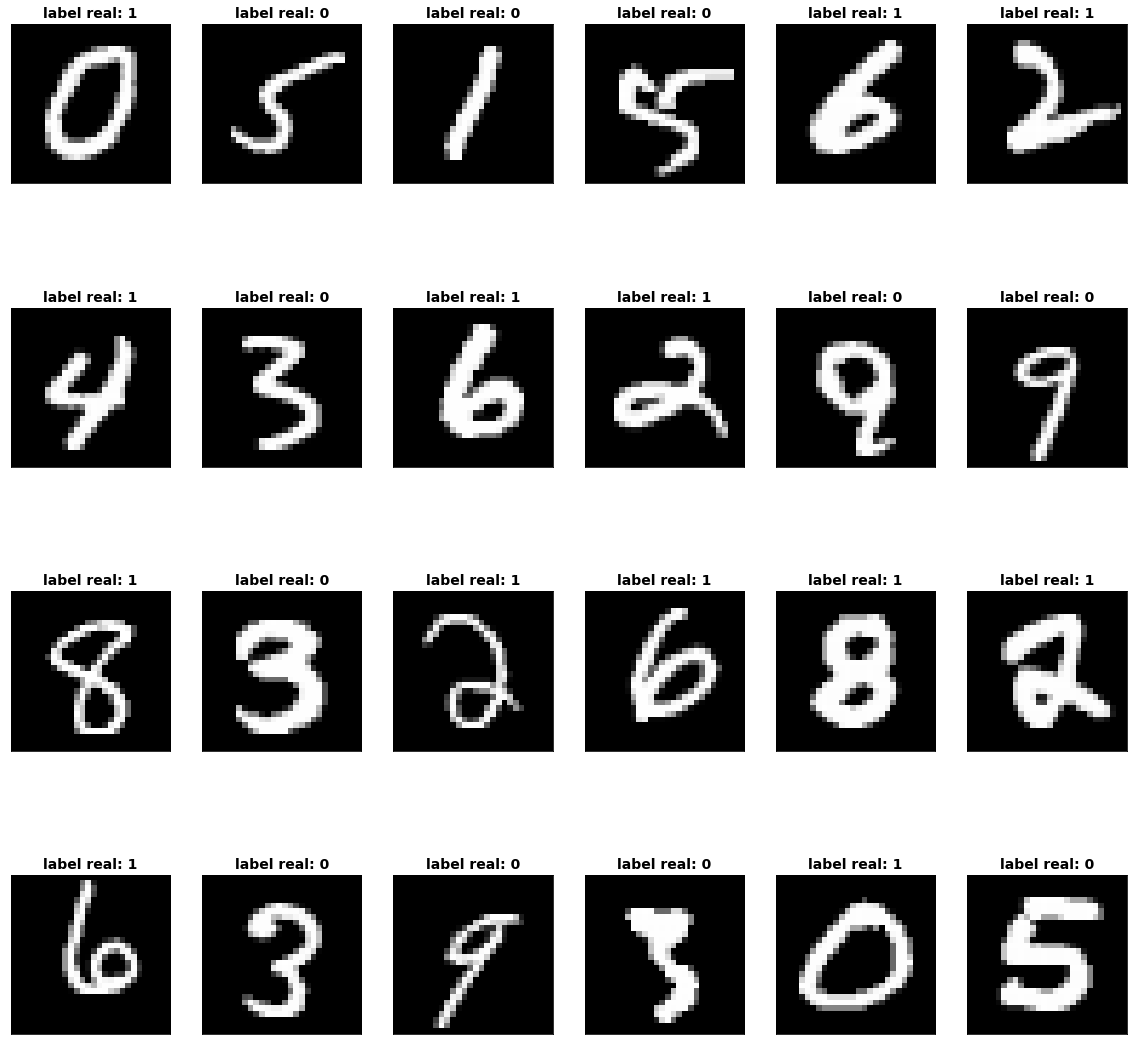

In [4]:
#classificação binária
random_idx = np.random.randint(0,Xtrain.shape[0], size = 24)

plt.figure(figsize=[20,20])
for i in range(len(random_idx)):
    idx_i = random_idx[i]
    xval = Xtrain[idx_i, :].reshape(28,28)
    yval = ytrain[idx_i]
    plt.subplot(4,6,i+1)
    plt.imshow(xval, cmap = plt.cm.Greys_r)
    plt.xticks([])
    plt.yticks([])
    plt.title("label real: "+str(yval), fontsize = 14, fontweight = 'bold')
plt.show()

In [5]:
print('Percentual de classe positiva: ',(ytrain.sum() / ytrain.size) * 100, '%')
print('Percentual de classe negativa: ',((ytrain.size-ytrain.sum()) / ytrain.size) * 100, '%')

Percentual de classe positiva:  49.154545454545456 %
Percentual de classe negativa:  50.84545454545455 %


In [6]:
#usando regressão logística
from sklearn.linear_model import LogisticRegression

#calcular o tempo de execução 
t0 = time.time()

#instanciando o modelo
logreg = LogisticRegression()
#fitando o objeto instanciado nos dados de treino
logreg.fit(Xtrain, ytrain)

t1 = time.time()
print("tempo (em segundos) para execução: ", np.round(t1-t0,2))

tempo (em segundos) para execução:  4.44


In [7]:
#treinando o algoritmo 
#valor de theta 0
print(logreg.intercept_)
#demais thetas
print(logreg.coef_)

[-0.00096029]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.37045921e-05  3.27105385e-05  3.00704005e-06  1.25293335e-07
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   3.20835325e-07  9.93023260e-07  2.57963185e-05  4.77976796e-05
   7.04037444e-05  4.93755412e-05  8.29768833e-05  1.20425195e-04
   2.05526410e-04  2.88620327e-04  1.04444995e-06 -1.51575122e-04
   2.26523007e-04  1.58010739e-04  6.54369443e-05  7.41714071e-05
   7.15032257e-05  3.05182338e-05  5.61726797e-06  3.22644658e-06
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  5.20812775e-07  8.67182665e

In [8]:
logreg.coef_.size

784

In [9]:
logreg.predict(Xtrain)

array([0, 1, 1, ..., 1, 1, 1])

In [10]:
#probabilidades - retorno da função
logreg.predict_proba(Xtrain)

array([[0.99822143, 0.00177857],
       [0.0706908 , 0.9293092 ],
       [0.22019037, 0.77980963],
       ...,
       [0.0094974 , 0.9905026 ],
       [0.31642346, 0.68357654],
       [0.01305649, 0.98694351]])

In [11]:
#comparando predições do classificador no dataset de treino
logreg.predict(Xtrain)[:20]

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0])

In [12]:
#target real
ytrain[:20]

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0])

In [13]:
#calculando acurácia do classificador
from sklearn.metrics import accuracy_score

print("acurácia - em dados de treino - da regressão logística foi de :", accuracy_score(y_true = ytrain, y_pred = logreg.predict(Xtrain)),"%")

acurácia - em dados de treino - da regressão logística foi de : 0.8989454545454545 %


In [14]:
#implementação manual da validação cruzada
from sklearn.model_selection import KFold

#validação cruzada com 5 folds
kf = KFold(n_splits = 5)

In [15]:
t0 = time.time()

classif__ = LogisticRegression() 
lista_acuracia_treino = []
lista_acuracia_validacao = []

for train_index, val_index in kf.split(Xtrain, ytrain):
    
    Xtrain_folds = Xtrain[train_index]
    ytrain_folds = ytrain[train_index]
    Xval_fold = Xtrain[val_index]
    yval_fold = ytrain[val_index]
    
    classif__.fit(Xtrain_folds, ytrain_folds)
    
    pred_treino = classif__.predict(Xtrain_folds)
    pred_validacao = classif__.predict(Xval_fold)
    
    lista_acuracia_treino.append(accuracy_score(y_pred = pred_treino, y_true = ytrain_folds))
    lista_acuracia_validacao.append(accuracy_score(y_pred = pred_validacao, y_true = yval_fold))
    
    
print("acurácias em treino: \n", lista_acuracia_treino, " \n| média: ", np.mean(lista_acuracia_treino))
print()
print("acurácias em validação: \n", lista_acuracia_validacao, " \n| média: ", np.mean(lista_acuracia_validacao))

t1 = time.time()
print("tempo (em segundos) para execução: ", np.round(t1-t0,2))

acurácias em treino: 
 [0.8980454545454546, 0.9018863636363637, 0.8996136363636363, 0.8980454545454546, 0.9005909090909091]  
| média:  0.8996363636363638

acurácias em validação: 
 [0.8978181818181818, 0.8867272727272727, 0.8928181818181818, 0.901090909090909, 0.89]  
| média:  0.8936909090909092
tempo (em segundos) para execução:  17.79


In [16]:
#curva ROC
logreg = LogisticRegression()
logreg.fit(Xtrain, ytrain)

from sklearn.metrics import roc_curve

In [17]:
#dataset de teste
fpr, tpr, thresholds = roc_curve(y_true = ytest, y_score = logreg.predict_proba(Xtest)[:, 1]) 

#fpr = false positive rate = taxa de falso positivos
#tpr = true positive rate = taxa de verdadeiro positivos
#thresholds = limiares usados

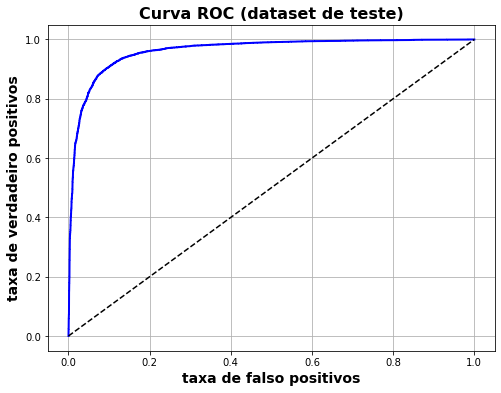

In [18]:
plt.figure(figsize=[8,6])
plt.plot(fpr, tpr, c = 'blue', lw = 2)
plt.title("Curva ROC (dataset de teste)", fontsize = 16, fontweight = 'bold')
plt.xlabel("taxa de falso positivos", fontsize = 14, fontweight = 'bold')
plt.ylabel("taxa de verdadeiro positivos", fontsize = 14, fontweight = 'bold')
plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
plt.grid()
plt.show()

In [19]:
from sklearn.metrics import roc_auc_score

#quantificando a area da curva ROC
roc_auc_score(y_true = ytest, y_score = logreg.predict_proba(Xtest)[:, 1])

0.9623706647471952

In [20]:
random_classifier = np.random.choice(a = [0,1], size = ytest.size, replace = True)

roc_auc_score(y_true = ytest, y_score = random_classifier)

0.5023350482573439

In [23]:
#KNN-classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import auc

knn = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2, n_jobs=-1)

In [24]:
knn.fit(Xtrain, ytrain)
pred_prob = knn.predict_proba(Xtrain)[:,1]
pred = np.where(pred_prob > 0.5, 1, 0)
fpr, tpr, thresholds = roc_curve(ytrain, pred) 
print(auc(fpr, tpr))

0.9922795644943243


In [27]:
#prevendo os valores de Y para os dados de teste (Xtest)
y_pred = knn.predict(Xtest) 

In [28]:
#importando métricas para validação do modelo
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#imprimindo a matriz confusa
print("Matriz Confusa: ")
print(confusion_matrix(ytest, y_pred), "\n")  

#imprimindo o relatório de classificação
print("Relatório de classificação: \n", classification_report(ytest, y_pred))  

#imprimindo o quão acurado foi o modelo
print('Acurácia do modelo: ' , accuracy_score(ytest, y_pred))

Matriz Confusa: 
[[7548   69]
 [ 148 7235]] 

Relatório de classificação: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      7617
           1       0.99      0.98      0.99      7383

    accuracy                           0.99     15000
   macro avg       0.99      0.99      0.99     15000
weighted avg       0.99      0.99      0.99     15000

Acurácia do modelo:  0.9855333333333334


In [25]:
#conclusão: com as análises acima vemos que o modelo de classificação performa bem, como demonstram também
#as métricas de performance utilizadas.

#sobre a utilização do knn-classifier: demora excessiva na fase de teste e o alto consumo de 
#memória para realizar esta atividade de teste. Então talvez o KNN não seja muito indicado
#para trabalhar com um grande volume de dados. 